In [1]:
import os
import scipy.io as scio
from matplotlib import pyplot as plt
import librosa
import librosa.display as LD
%matplotlib inline
import numpy as np
import pandas as pd

# 风扇和驱动端振动数据，以及电机转速
DE - drive end accelerometer data 驱动端加速度数据 

FE - fan end accelerometer data 风扇端加速度数据 

BA - base accelerometer data 基座加速度数据（正常） 

time - time series data 时间序列数据 

RPM- rpm during testing 转每分钟，除以60为旋转频率 

In [2]:
drive_12_dir = 'dataset/12k Drive End Bearing Fault Data/'
drive_12_nums = len(os.listdir(drive_12_dir))

print(f'drive_12 data nums: {drive_12_nums}')

drive_12 data nums: 60


In [3]:
# drive_12_sample_path = os.path.join(drive_12_dir, os.listdir(drive_12_dir)[np.random.randint(0,drive_12_nums)])
drive_12_sample_path = drive_12_dir+'105.mat'
print(f'drive_12_sample_path :{drive_12_sample_path}')

drive_12_sample_path :dataset/12k Drive End Bearing Fault Data/105.mat


# 12k Drive End Bearing Fault Data Analysis

In [4]:
drive_12_sample = scio.loadmat(drive_12_sample_path)
drive_12_sample_id = drive_12_sample_path.split('/')[-1].split('.')[0]
drive_12_sample_sr = 12000
drive_12_sample

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:49:59 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X105_DE_time': array([[-0.08300435],
        [-0.19573433],
        [ 0.23341928],
        ...,
        [-0.31642363],
        [-0.06367457],
        [ 0.26736822]]),
 'X105_FE_time': array([[-0.40207455],
        [-0.00472545],
        [-0.10663091],
        ...,
        [ 0.31598909],
        [ 0.35091636],
        [ 0.03307818]]),
 'X105_BA_time': array([[ 0.06466148],
        [-0.02309626],
        [-0.08852226],
        ...,
        [ 0.09648926],
        [ 0.08405591],
        [-0.02015893]]),
 'X105RPM': array([[1797]], dtype=uint16)}

In [49]:
drive_12_sample_DE_time = drive_12_sample[f'X{drive_12_sample_id}_DE_time']
drive_12_sample_FE_time = drive_12_sample[f'X{drive_12_sample_id}_FE_time']
drive_12_sample_BA_time = drive_12_sample[f'X{drive_12_sample_id}_BA_time']
drive_12_sample_RPM = drive_12_sample[f'X{drive_12_sample_id}RPM']

print(f'drive_12_sample_DE_time data shape: {drive_12_sample_DE_time.shape}')
print(f'drive_12_sample_FE_time data shape: {drive_12_sample_FE_time.shape}')
print(f'drive_12_sample_BA_time data shape: {drive_12_sample_BA_time.shape}')
print(f'drive_12_sample_RPM data: {drive_12_sample_RPM}')

print('\n----------这是一条分割线----------\n')

drive_12_sample_DE_time = drive_12_sample_DE_time.reshape(-1)
drive_12_sample_FE_time = drive_12_sample_FE_time.reshape(-1)
drive_12_sample_BA_time = drive_12_sample_BA_time.reshape(-1)
drive_12_sample_RPM = drive_12_sample_RPM[0][0]

print(f'drive_12_sample_DE_time data shape: {drive_12_sample_DE_time.shape}')
print(f'drive_12_sample_FE_time data shape: {drive_12_sample_FE_time.shape}')
print(f'drive_12_sample_BA_time data shape: {drive_12_sample_BA_time.shape}')
print(f'drive_12_sample_RPM data: {drive_12_sample_RPM}')

print('\n----------DE_time_describe----------')
print(pd.Series(drive_12_sample_DE_time).describe())
print('\n----------FE_time_describe----------')
print(pd.Series(drive_12_sample_FE_time).describe())
print('\n----------BA_time_describe----------')
print(pd.Series(drive_12_sample_BA_time).describe())

drive_12_sample_DE_time data shape: (121991, 1)
drive_12_sample_FE_time data shape: (121991, 1)
drive_12_sample_BA_time data shape: (121991, 1)
drive_12_sample_RPM data: [[1723]]

----------这是一条分割线----------

drive_12_sample_DE_time data shape: (121991,)
drive_12_sample_FE_time data shape: (121991,)
drive_12_sample_BA_time data shape: (121991,)
drive_12_sample_RPM data: 1723

----------DE_time_describe----------
count    121991.000000
mean          0.002535
std           0.094682
min          -0.665171
25%          -0.059761
50%           0.002680
75%           0.064511
max           0.665130
dtype: float64

----------FE_time_describe----------
count    121991.000000
mean          0.031944
std           0.098267
min          -0.425702
25%          -0.034311
50%           0.031640
75%           0.097796
max           0.485078
dtype: float64

----------BA_time_describe----------
count    121991.000000
mean          0.005051
std           0.037173
min          -0.142400
25%          -0.02

dataset/12k Drive End Bearing Fault Data/200.mat
DE_time analysis


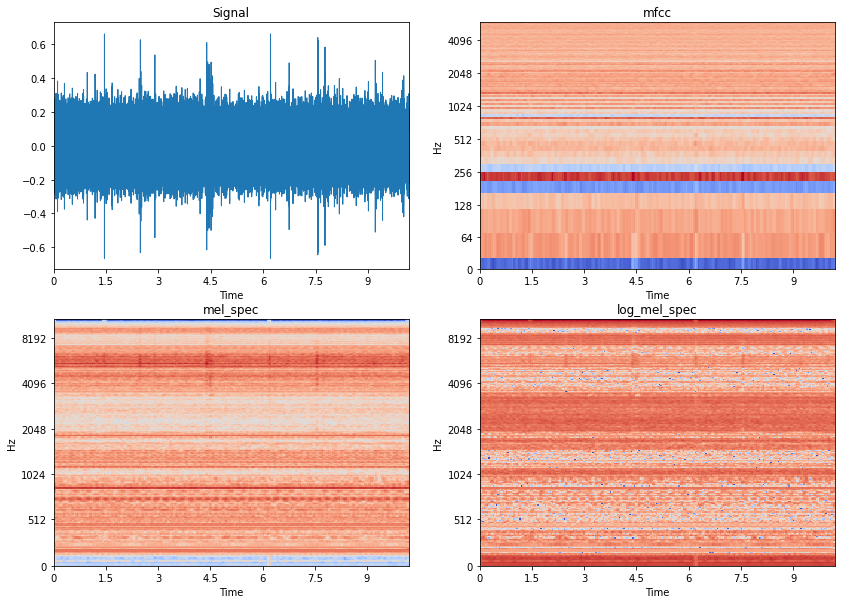

In [100]:
drive_12_sample_DE_mfcc = librosa.feature.mfcc(drive_12_sample_DE_time, sr=drive_12_sample_sr, n_mfcc=256)
drive_12_sample_DE_mel = librosa.feature.melspectrogram(drive_12_sample_DE_time, sr=drive_12_sample_sr, n_mels=256)
drive_12_sample_DE_mel_spec = librosa.power_to_db(drive_12_sample_DE_mel)
drive_12_sample_DE_log_mel_spec = librosa.amplitude_to_db(drive_12_sample_DE_mel_spec)

print(f'{drive_12_sample_path}')
print('DE_time analysis')
plt.figure(figsize=(14, 10))

# 原始信号频域图
plt.subplot(2,2,1)
plt.title(f'Signal')
LD.waveplot(drive_12_sample_DE_time, sr=drive_12_sample_sr, x_axis='time')

# 梅尔频率倒谱系数
plt.subplot(2,2,2)
plt.title('mfcc')
LD.specshow(drive_12_sample_DE_mfcc, sr=drive_12_sample_sr, x_axis='time', y_axis='log')

# 梅尔频谱
plt.subplot(2,2,3)
plt.title('mel_spec')
LD.specshow(drive_12_sample_DE_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# log 梅尔频谱
plt.subplot(2,2,4)
plt.title('log_mel_spec')
LD.specshow(drive_12_sample_DE_log_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# plt.savefig('./temp/drive_12K_200mat_DE_time.jpg')
plt.show()

dataset/12k Drive End Bearing Fault Data/200.mat
FE_time analysis


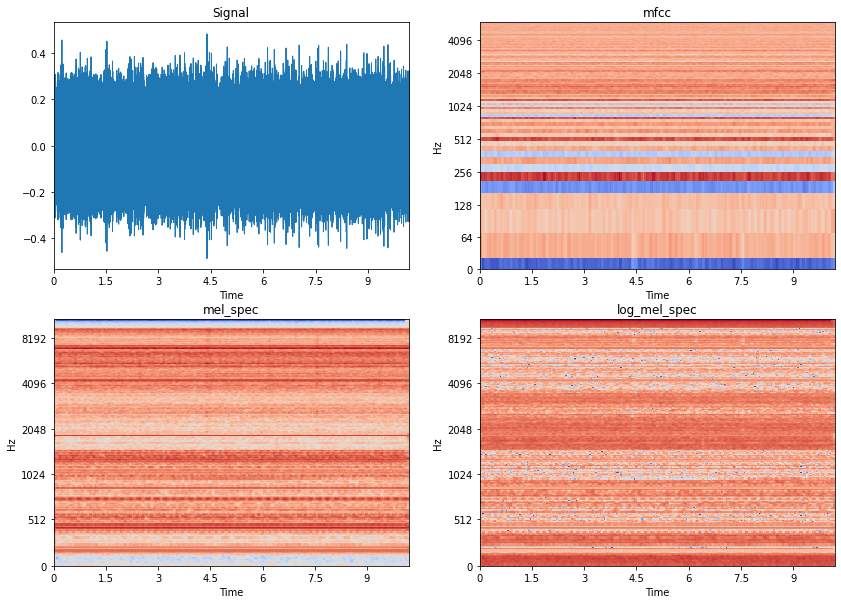

In [101]:
drive_12_sample_FE_mfcc = librosa.feature.mfcc(drive_12_sample_FE_time, sr=drive_12_sample_sr, n_mfcc=256)
drive_12_sample_FE_mel = librosa.feature.melspectrogram(drive_12_sample_FE_time, sr=drive_12_sample_sr, n_mels=256)
drive_12_sample_FE_mel_spec = librosa.power_to_db(drive_12_sample_FE_mel)
drive_12_sample_FE_log_mel_spec = librosa.amplitude_to_db(drive_12_sample_FE_mel_spec)

print(f'{drive_12_sample_path}')
print('FE_time analysis')
plt.figure(figsize=(14, 10))

# 原始信号频域图
plt.subplot(2,2,1)
plt.title(f'Signal')
LD.waveplot(drive_12_sample_FE_time, sr=drive_12_sample_sr, x_axis='time')

# 梅尔频率倒谱系数
plt.subplot(2,2,2)
plt.title('mfcc')
LD.specshow(drive_12_sample_FE_mfcc, sr=drive_12_sample_sr, x_axis='time', y_axis='log')

# 梅尔频谱
plt.subplot(2,2,3)
plt.title('mel_spec')
LD.specshow(drive_12_sample_FE_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# log 梅尔频谱
plt.subplot(2,2,4)
plt.title('log_mel_spec')
LD.specshow(drive_12_sample_FE_log_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# plt.savefig('./temp/drive_12K_200mat_FE_time.jpg')
plt.show()

dataset/12k Drive End Bearing Fault Data/200.mat
BA_time analysis


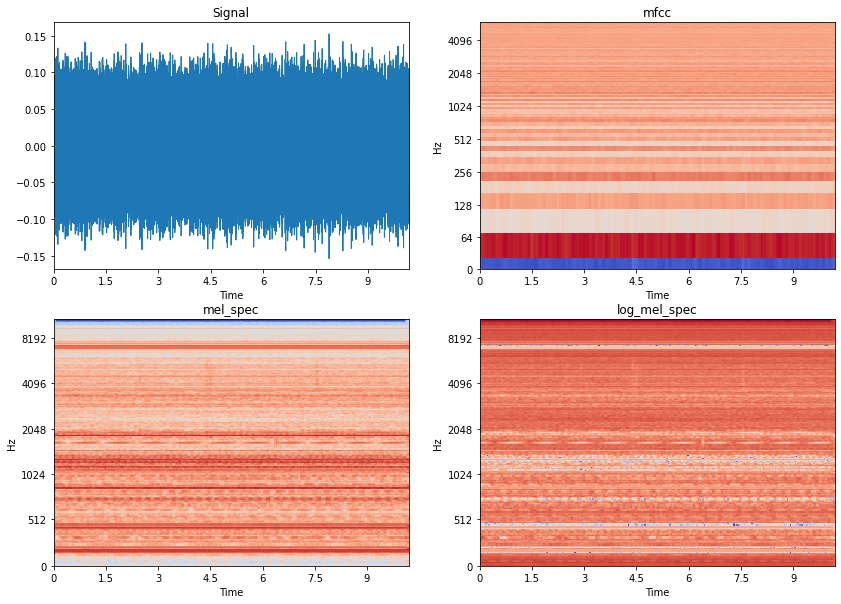

In [102]:
drive_12_sample_BA_mfcc = librosa.feature.mfcc(drive_12_sample_BA_time, sr=drive_12_sample_sr, n_mfcc=256)
drive_12_sample_BA_mel = librosa.feature.melspectrogram(drive_12_sample_BA_time, sr=drive_12_sample_sr, n_mels=256)
drive_12_sample_BA_mel_spec = librosa.power_to_db(drive_12_sample_BA_mel)
drive_12_sample_BA_log_mel_spec = librosa.amplitude_to_db(drive_12_sample_BA_mel_spec)

print(f'{drive_12_sample_path}')
print('BA_time analysis')
plt.figure(figsize=(14, 10))

# 原始信号频域图
plt.subplot(2,2,1)
plt.title(f'Signal')
LD.waveplot(drive_12_sample_BA_time, sr=drive_12_sample_sr, x_axis='time')

# 梅尔频率倒谱系数
plt.subplot(2,2,2)
plt.title('mfcc')
LD.specshow(drive_12_sample_BA_mfcc, sr=drive_12_sample_sr, x_axis='time', y_axis='log')

# 梅尔频谱
plt.subplot(2,2,3)
plt.title('mel_spec')
LD.specshow(drive_12_sample_BA_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# log 梅尔频谱
plt.subplot(2,2,4)
plt.title('log_mel_spec')
LD.specshow(drive_12_sample_BA_log_mel_spec, sr=drive_12_sample_sr, x_axis='time', y_axis='mel')

# plt.savefig('./temp/drive_12K_200mat_BA_time.jpg')
plt.show()

# 做15分类 对每一类数据，log_mel_spectrogram进行分析

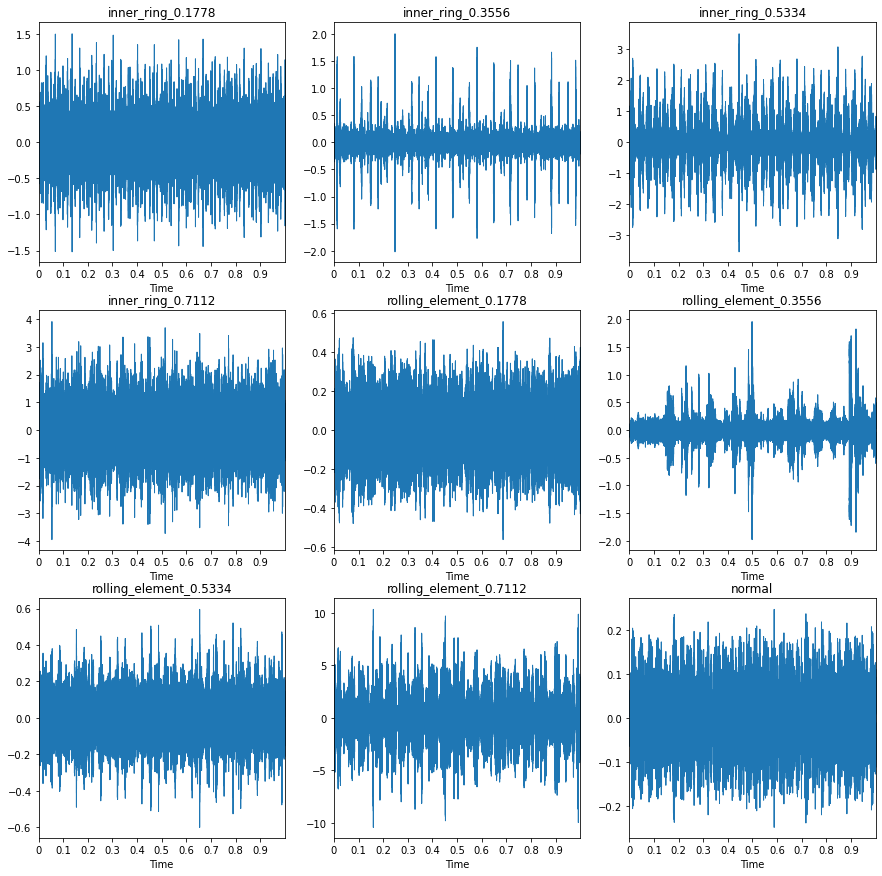

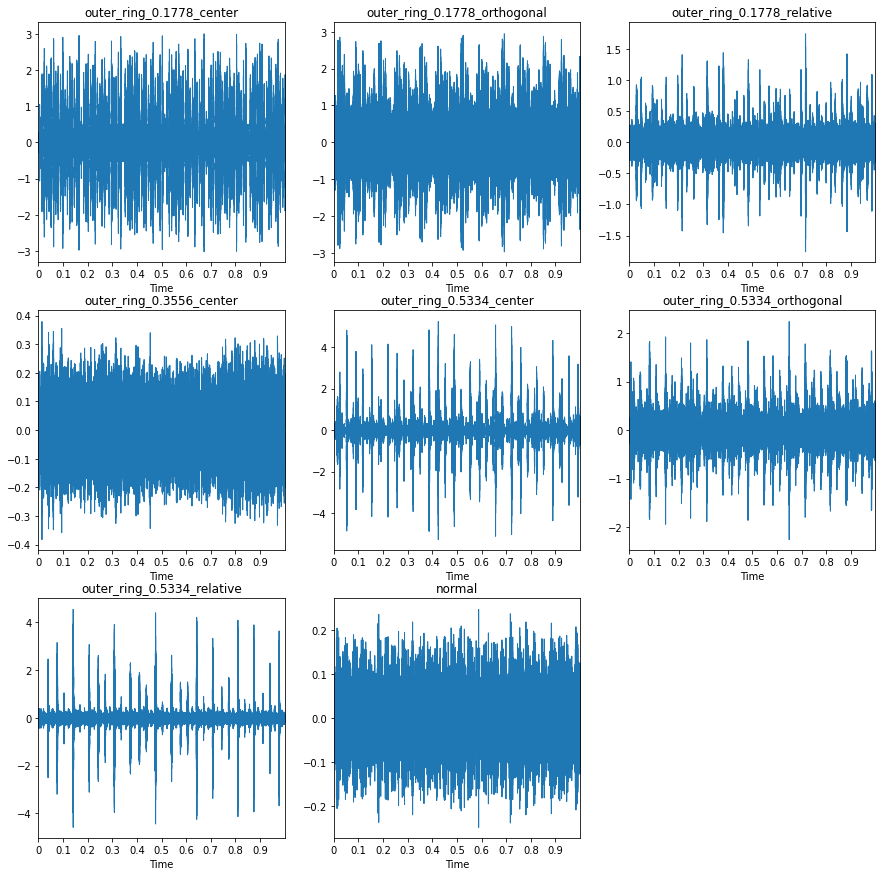

In [19]:
DATA_TYPE_TO_ID_M = {
    'inner_ring_0.1778': 0,
    'inner_ring_0.3556': 1,
    'inner_ring_0.5334': 2,
    'inner_ring_0.7112': 3,
    'rolling_element_0.1778': 4,
    'rolling_element_0.3556': 5,
    'rolling_element_0.5334': 6,
    'rolling_element_0.7112': 7,
    'outer_ring_0.1778_center': 8,
    'outer_ring_0.1778_orthogonal': 9,
    'outer_ring_0.1778_relative': 10,
    'outer_ring_0.3556_center': 11,
    'outer_ring_0.5334_center': 12,
    'outer_ring_0.5334_orthogonal': 13,
    'outer_ring_0.5334_relative': 14,
    'normal':15
}
def load_data(data_name, data_id):
    data_path = f'./dataset/12k Drive End Bearing Fault Data/{data_name}.mat'
    data = scio.loadmat(data_path)[f'X{data_id}_DE_time'].reshape(-1)[12000*1:12000*2]
    return data
def get_feature(data, n_mels):
    mel_spec = librosa.feature.melspectrogram(data, sr=12000, n_mels=n_mels)
    log_mel_spec = librosa.amplitude_to_db(mel_spec)
    return log_mel_spec
def plt_waveplot(data, rol, col, i, index):
    name = list(DATA_TYPE_TO_ID_M.keys())[index]
    plt.subplot(rol, col, i)
    plt.title(name)
    LD.waveplot(data, sr=12000, x_axis='time')
    
data_0 = load_data(105, '105')
data_1 = load_data(169, '169')
data_2 = load_data(209, '209')
data_3 = load_data(3001, '056')
data_4 = load_data(118, '118')
data_5 = load_data(185, '185')
data_6 = load_data(222, '222')
data_7 = load_data(3005, '048')
data_8 = load_data(131, '131')
data_9 = load_data(144, '144')
data_10 = load_data(156, '156')
data_11 = load_data(197, '197')
data_12 = load_data(234, '234')
data_13 = load_data(246, '246')
data_14 = load_data(258, '258')

data_15_path = f'./dataset/Normal Baseline Data/97.mat'
data_15 = scio.loadmat(data_15_path)[f'X097_DE_time'].reshape(-1)[12000*1:12000*2]

plt.figure(figsize=(15,15))

plt_waveplot(data_0, 3,3,1,0)
plt_waveplot(data_1, 3,3,2,1)
plt_waveplot(data_2, 3,3,3,2)
plt_waveplot(data_3, 3,3,4,3)
plt_waveplot(data_4, 3,3,5,4)
plt_waveplot(data_5, 3,3,6,5)
plt_waveplot(data_6, 3,3,7,6)
plt_waveplot(data_7, 3,3,8,7)
plt_waveplot(data_15, 3,3,9,15)

plt.savefig('./temp/drive_12_0-8.jpg')

plt.figure(figsize=(15,15))
plt_waveplot(data_8, 3,3,1,8)
plt_waveplot(data_9, 3,3,2,9)
plt_waveplot(data_10, 3,3,3,10)
plt_waveplot(data_11, 3,3,4,11)
plt_waveplot(data_12, 3,3,5,12)
plt_waveplot(data_13, 3,3,6,13)
plt_waveplot(data_14, 3,3,7,14)
plt_waveplot(data_15, 3,3,8,15)
plt.savefig('./temp/drive_12_9-14.jpg')
plt.show()

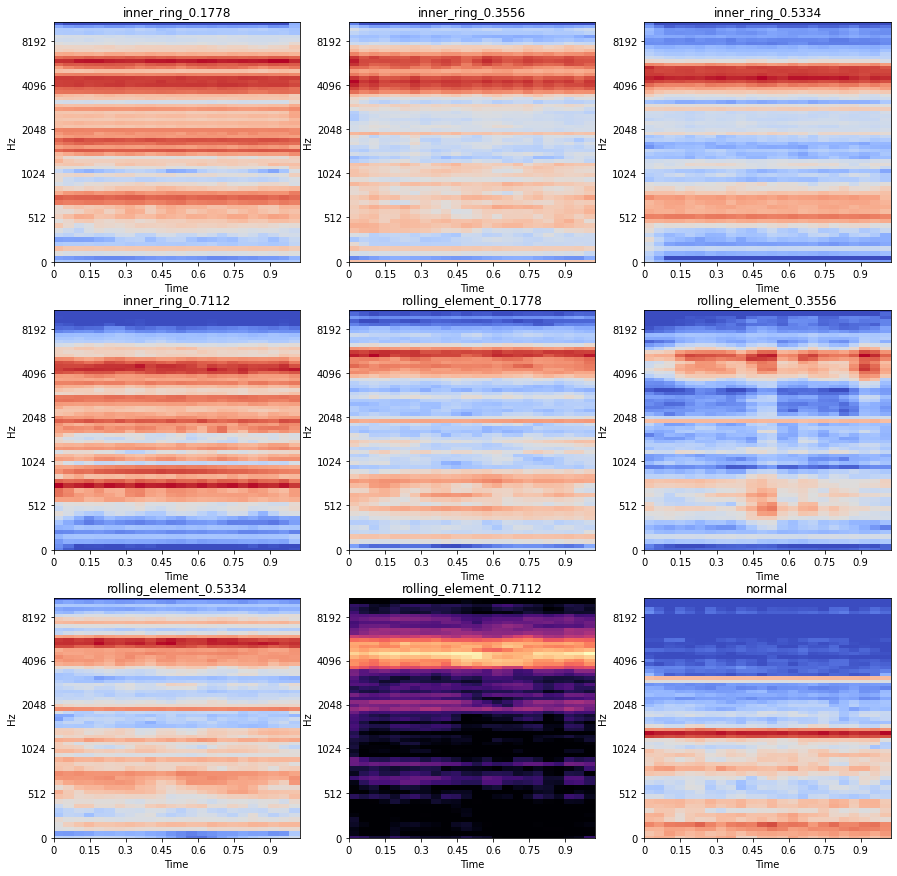

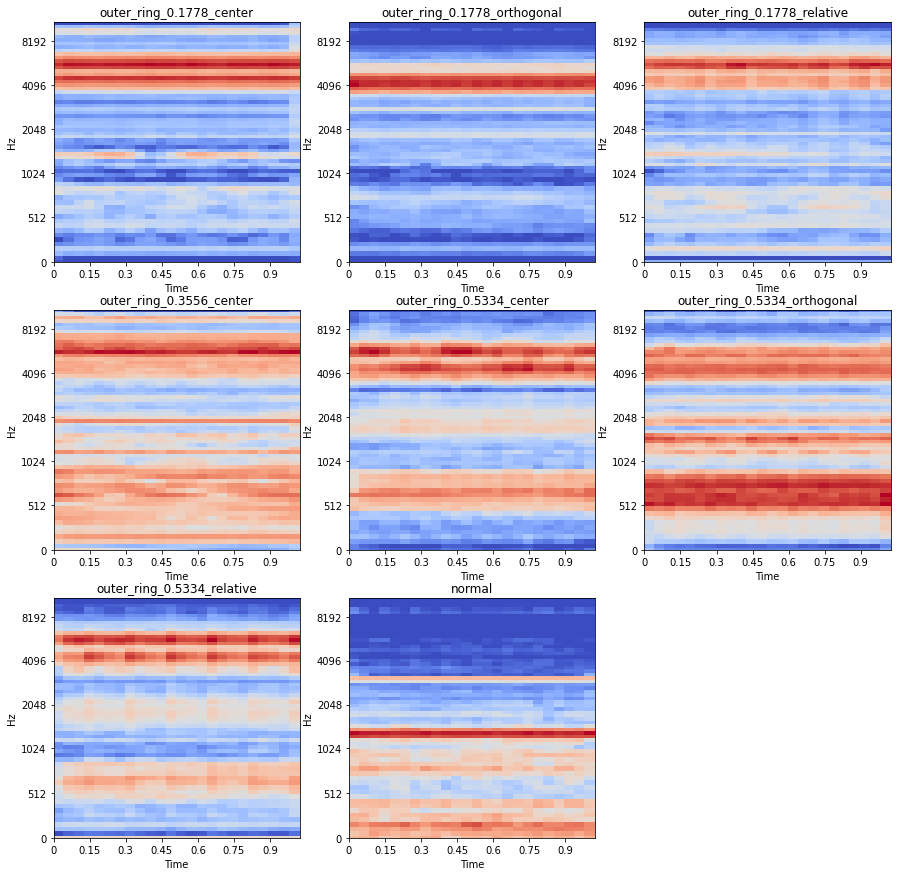

In [22]:
def plt_specplot(data, rol, col, i, index):
    name = list(DATA_TYPE_TO_ID_M.keys())[index]
    plt.subplot(rol, col, i)
    plt.title(name)
    LD.specshow(data, sr=12000, x_axis='time',y_axis='mel')
feature_0 = get_feature(data_0, 64)
feature_1 = get_feature(data_1, 64)
feature_2 = get_feature(data_2, 64)
feature_3 = get_feature(data_3, 64)
feature_4 = get_feature(data_4, 64)
feature_5 = get_feature(data_5, 64)
feature_6 = get_feature(data_6, 64)
feature_7 = get_feature(data_7, 64)
feature_8 = get_feature(data_8, 64)
feature_9 = get_feature(data_9, 64)
feature_10 = get_feature(data_10, 64)
feature_11 = get_feature(data_11, 64)
feature_12 = get_feature(data_12, 64)
feature_13 = get_feature(data_13, 64)
feature_14 = get_feature(data_14, 64)
feature_15 = get_feature(data_15, 64)

plt.figure(figsize=(15,15))
plt_specplot(feature_0, 3,3,1,0)
plt_specplot(feature_1, 3,3,2,1)
plt_specplot(feature_2, 3,3,3,2)
plt_specplot(feature_3, 3,3,4,3)
plt_specplot(feature_4, 3,3,5,4)
plt_specplot(feature_5, 3,3,6,5)
plt_specplot(feature_6, 3,3,7,6)
plt_specplot(feature_7, 3,3,8,7)
plt_specplot(feature_15, 3,3,9,15)
plt.savefig('./temp/drive_12_logmelspec_0-8.jpg')

plt.figure(figsize=(15,15))
plt_specplot(feature_8, 3,3,1,8)
plt_specplot(feature_9, 3,3,2,9)
plt_specplot(feature_10, 3,3,3,10)
plt_specplot(feature_11, 3,3,4,11)
plt_specplot(feature_12, 3,3,5,12)
plt_specplot(feature_13, 3,3,6,13)
plt_specplot(feature_14, 3,3,7,14)
plt_specplot(feature_15, 3,3,8,15)
plt.savefig('./temp/drive_12_logmelspec_9-14.jpg')
plt.show()